# One-Dimensional Harmonic Oscillator using Finite Differences

In [2]:
%matplotlib inline

In [3]:
from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [4]:
from numpy import sqrt

# Normalización de las funciones 

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)

        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
#        print j,' integral (sin normalizar) =',rnorm
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
#       Check Normalization
#        suma = 0.0
#        for i in range(1,n):
#             suma = suma + U[i,j]**2               
#        print j,' suma=',suma*h
       
    return  

In [ ]:
from numpy import diag,  linspace, array
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

nfunctions = 5

# array definitions
nsize = 100
xmin=-3
xmax=3
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])

# Oscillator Data
m = 1.0
omega = 1.0

# Kinetic (T) and Potential (V)
T = (-0.5/m)*Laplacian(x)
V = 0.5*(omega**2)*(x**2)

# Hamiltonian
H =  T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the Harmonic potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions

for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level 
    # so they don't all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,0,6])
title("Eigenfunctions of the Quantum Harmonic Oscillator")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()


# One-Dimensional Harmonic Oscillator using Special Functions

In [17]:
from sympy import hermite 
from math import gamma, exp, pi, sqrt

# Solución Analítica

def oscillator(n,x):

    arg = 2**n*gamma(n+1)*sqrt(pi)
    psi = 1.0/sqrt(arg) * exp(-x**2/2.0) * hermite(n, x)
    return psi



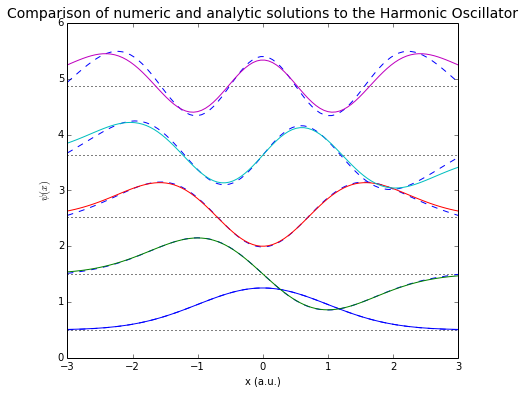

In [7]:
from numpy import  linspace , zeros
from matplotlib.pyplot import plot, title, legend, show, axhline, \
                              xlabel, ylabel, axis, figure

nfunctions = 5

# array definitions
nsize = 100
xmin=-3
xmax=3
x = linspace(xmin,xmax,nsize)
psi = zeros(nsize)

# Plot wavefunctions

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

for n in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[n],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level 
    # so they don't all pile up on each other:
    plot(x,U[:,n]+E[n], ls="--",color="b")

    for i in range(0,nsize):
        psi[i] = (-1)**n*oscillator(n,x[i])+E[n]

    plot(x,psi)
    
    
xlabel('x (a.u.)')
ylabel(r'$\psi(x)$')
title("Comparison of numeric and analytic solutions to\
 the Harmonic Oscillator",size=14)
#legend()
axis([xmin,xmax,0,6])
show()


#### Chequeo de Normalización (analítico)

In [8]:
import numpy as np
import matplotlib as mp
import sympy as sy

from sympy import *

x  = symbols('x ')
k, m, n = symbols('k m n', integer=True)
g1 = symbols('g1', cls=Function)


In [9]:
def oscillator(n,x):
    psi = 1.0/sqrt((2**n*gamma(n+1)*sqrt(pi))) * exp(-x**2/2.0) * hermite(n, x)
    return psi

In [10]:
integrate(oscillator(0,x)**2,(x,-oo,oo))

1.00000000000000

In [11]:
integrate(oscillator(0,x)*oscillator(3,x),(x,-oo,oo))

0

In [12]:
oscillator(1,3.9).evalf()

0.00206292102336555

In [13]:
g1 = lambda x: oscillator(1,x).evalf()

In [14]:
for x in range(-5,5):
    print x,g1(x)

-5 -1.97932226601793e-5
-4 -0.00142538329844946
-3 -0.0354016591068940
-2 -0.287520332179080
-1 -0.644288365113475
0 0
1 0.644288365113475
2 0.287520332179080
3 0.0354016591068940
4 0.00142538329844946


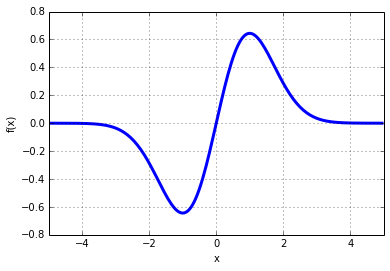

In [15]:
mpmath.plot(g1,[-5,5])

In [16]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
